In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("/content/BlinkIT Grocery Data.csv")
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [9]:
df.tail()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
8518,low fat,NCT53,Health and Hygiene,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,164.5526,4.0
8519,low fat,FDN09,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,NaN,241.6828,4.0
8520,low fat,DRE13,Soft Drinks,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,NaN,86.6198,4.0
8521,reg,FDT50,Dairy,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0
8522,reg,FDM58,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,112.2544,4.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
df.describe()

,Outlet Establishment Year,Item Visibility,Item Weight,Sales,Rating
count,8523.000000,8523.000000,7060.000000,8523.000000,8523.000000
mean,2016.450546,0.066132,12.857645,140.992783,3.965857
std,3.189396,0.051598,4.643456,62.275067,0.605651
min,2011.000000,0.000000,4.555000,31.290000,1.000000
25%,2014.000000,0.026989,8.773750,93.826500,4.000000
50%,2016.000000,0.053931,12.600000,143.012800,4.000000
75%,2018.000000,0.094585,16.850000,185.643700,4.200000
max,2022.000000,0.328391,21.350000,266.888400,5.000000


In [8]:
df.shape

(8523, 12)

In [6]:
df.isnull().sum()

,0
Item Fat Content,0
Item Identifier,0
Item Type,0
Outlet Establishment Year,0
Outlet Identifier,0
Outlet Location Type,0
Outlet Size,0
Outlet Type,0
Item Visibility,0
Item Weight,1463


In [11]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

In [12]:
df.dtypes

,0
Item Fat Content,object
Item Identifier,object
Item Type,object
Outlet Establishment Year,int64
Outlet Identifier,object
Outlet Location Type,object
Outlet Size,object
Outlet Type,object
Item Visibility,float64
Item Weight,float64


In [13]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


In [14]:
df['Item Fat Content'] = df['Item Fat Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})

In [15]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat']


In [16]:
#Total Sales

total_sales = df['Sales'].sum()
print("Total Sales:",total_sales)

Total Sales: 1201681.4928


In [17]:
# Avegrage Sales

average_sales = df['Sales'].mean()
print("Average Sales:",average_sales)

Average Sales: 140.99278338613163


In [18]:
# Number of Items solds

no_of_items_sold = df['Sales'].count()
print("Number of Items Sold:",no_of_items_sold)

Number of Items Sold: 8523


In [19]:
#Average Ratings

average_ratings = df['Rating'].mean()
print("Average Ratings:",average_ratings)

Average Ratings: 3.965857092573038


# **1.Total Sales by Fat Content**

In [23]:
sales_by_fat = df.groupby('Item Fat Content')['Sales'].sum()

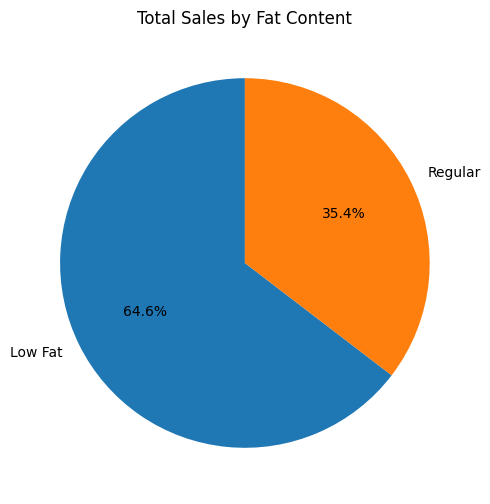

In [24]:
plt.figure(figsize=(8,6))
plt.pie(sales_by_fat, labels = sales_by_fat.index, autopct='%1.1f%%', startangle=90)
plt.xlabel = 'Item Fat Content'
plt.ylabel = 'Sales'
plt.title('Total Sales by Fat Content')
plt.show()


# **2.Total Sales by Item Type**

In [25]:
sales_by_items = df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)

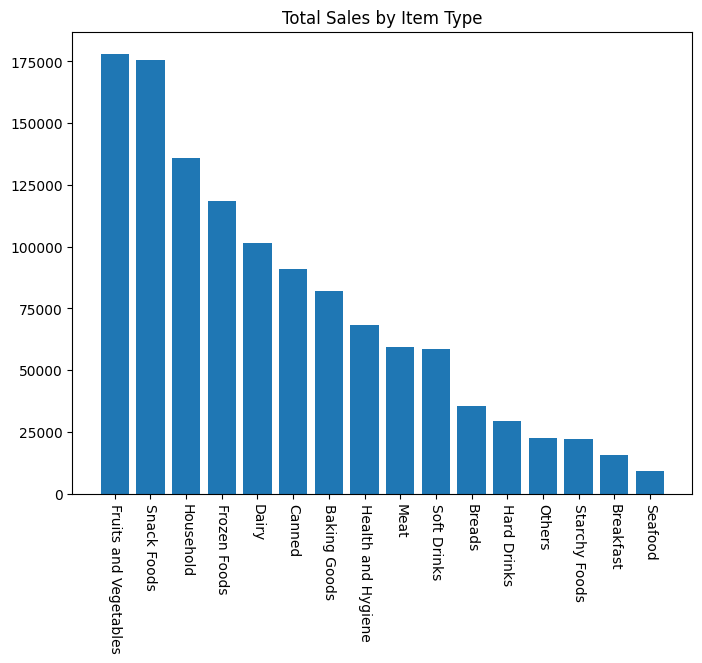

In [31]:
plt.figure(figsize=(8,6))
plt.bar(sales_by_items.index, sales_by_items.values)
plt.xticks(rotation = -90)
plt.xlabel = 'Item Type'
plt.ylabel = 'Sales'
plt.title('Total Sales by Item Type')
plt.show()

# **3.Fat Content by Outlet for Total Sales**

In [32]:
grouped = df.groupby(['Outlet Location Type', 'Item Fat Content'])['Sales'].sum().unstack()
grouped = grouped[['Regular', 'Low Fat']]



<Figure size 800x600 with 0 Axes>

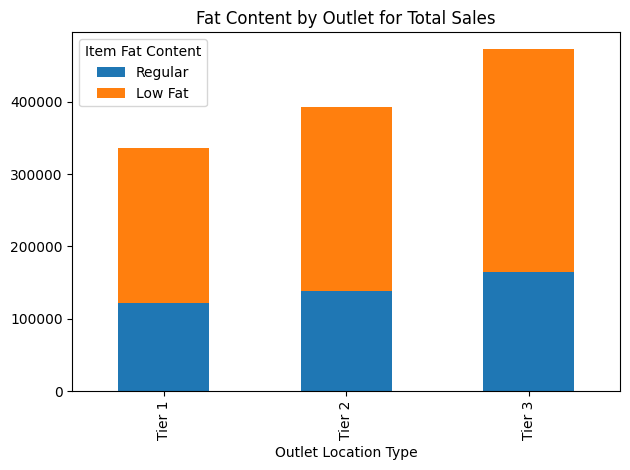

In [34]:
plt.figure(figsize=(8,6))
grouped.plot(kind='bar', stacked=True)
plt.xlabel = 'Outlet Location Type'
plt.ylabel = 'Sales'
plt.title('Fat Content by Outlet for Total Sales')
plt.tight_layout()
plt.show()

# **4.Total Sales by Outlet Establishment**

In [35]:
sales_by_year = df.groupby('Outlet Establishment Year')['Sales'].sum().sort_index()

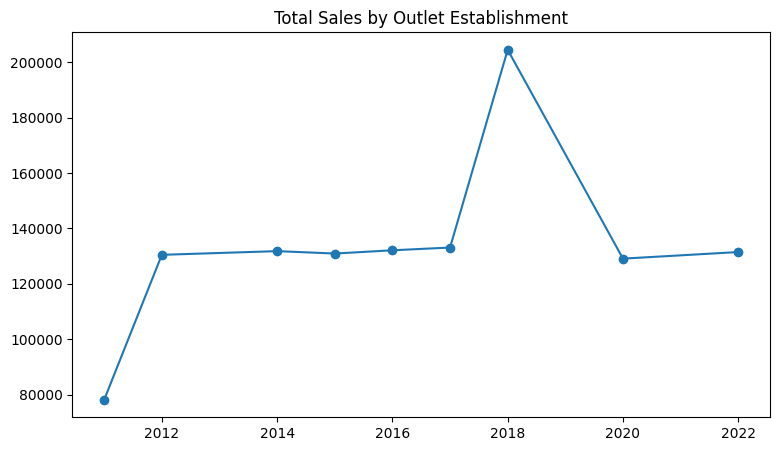

In [38]:
plt.figure(figsize=(9,5))
plt.plot(sales_by_year.index, sales_by_year.values, marker = 'o', linestyle = '-')
plt.xlabel = 'Outlet Establishment Year'
plt.ylabel = 'Sales'
plt.title('Total Sales by Outlet Establishment')
plt.show()


# **5.Sales By Outlet Establishment**

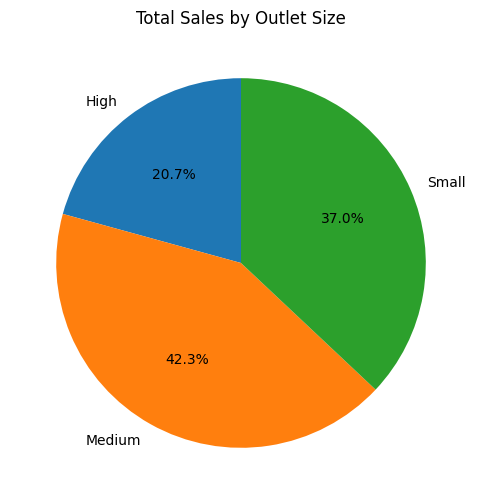

In [39]:
sales_by_size = df.groupby('Outlet Size')['Sales'].sum()

plt.figure(figsize=(8,6))
plt.pie(sales_by_size, labels = sales_by_size.index, autopct='%1.1f%%', startangle=90)
plt.xlabel = 'Outlet Size'
plt.ylabel = 'Sales'
plt.title('Total Sales by Outlet Size')
plt.show()

# **6.Sales By Outlet Size**

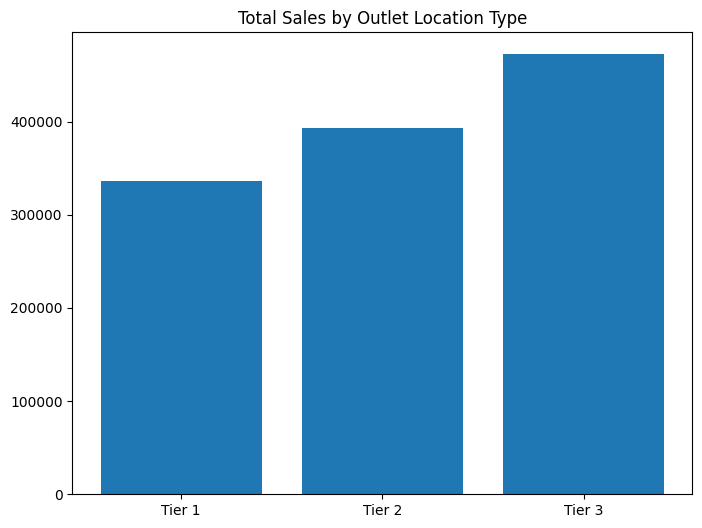

In [42]:
sales_by_location = df.groupby('Outlet Location Type')['Sales'].sum().reset_index()

plt.figure(figsize=(8,6))
plt.bar(sales_by_location['Outlet Location Type'], sales_by_location['Sales'])
plt.xlabel = 'Outlet Location Type'
plt.ylabel = 'Sales'
plt.title('Total Sales by Outlet Location Type')
plt.show()